<a href="https://colab.research.google.com/github/Darkred69/Predict-car-price/blob/main/Predict_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and cleansing data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Midterm MindX/car_data - car_data.csv')

Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
 
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. **price: continuous from 5118 to 45400.**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
#Replace "?" with nan value
df.replace("?",np.nan,inplace = True)
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [ ]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Null in "normalized-losses" -> Replace null with average

In [ ]:
#Find the ID of Null values
is_null = df["normalized-losses"].isnull()
null_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == True:
    null_list.append(i)
null_list

[0,
 1,
 2,
 5,
 7,
 9,
 14,
 15,
 16,
 17,
 43,
 44,
 45,
 46,
 48,
 49,
 63,
 66,
 71,
 73,
 74,
 75,
 82,
 83,
 84,
 109,
 110,
 113,
 114,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 181,
 189,
 191,
 192,
 193]

In [ ]:
#Find the ID list of non-null values
nonnull_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == False:
    nonnull_list.append(i)

#Find the number that the ID alocate to
sum_list=[]
for i in nonnull_list:
  sum_list.append(df["normalized-losses"][i])

#Convert the list to int and calculate sum
sum_list = [int(i) for i in sum_list]
sum=0
for i in sum_list:
  sum = sum + i
sum

#Calculate the average
aver = sum/(len(df)-len(null_list))
aver


122.0

In [ ]:
#Replace null values with average
for i in null_list:
  df["normalized-losses"][i] = aver
#Change data type of col "normalized-losses" to int
df["normalized-losses"]= pd.to_numeric(df["normalized-losses"])

<ipython-input-33-bdc5c3c63546>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["normalized-losses"][i] = aver


## Null in "num-of-doors" -> Replace null with mod

In [ ]:
#Find the ID of Null values
is_null = df["num-of-doors"].isnull()
null_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == True:
    null_list.append(i)
null_list

[27, 63]

In [ ]:
#Find the ID list of non-null values
nonnull_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == False:
    nonnull_list.append(i)

#Find the number that the ID alocate to
mod_list=[]
for i in nonnull_list:
  mod_list.append(df["num-of-doors"][i])
print(mod_list.count('two'))
print(mod_list.count('four'))

#Replace null values with 'four'
for i in null_list:
  df["num-of-doors"][i] = "four"

89
114


<ipython-input-35-2f41e187584c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num-of-doors"][i] = "four"


## Null in "bore" -> Replace null with average

In [ ]:
#Find the ID of Null values
is_null = df["bore"].isnull()
null_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == True:
    null_list.append(i)
null_list

[55, 56, 57, 58]

In [ ]:
#Find the ID list of non-null values
nonnull_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == False:
    nonnull_list.append(i)

#Find the number that the ID alocate to
sum_list=[]
for i in nonnull_list:
  sum_list.append(df["bore"][i])

#Convert the list to int and calculate sum
sum_list = [round(float(i)) for i in sum_list]
sum=0
for i in sum_list:
  sum = sum + i
sum

#Calculate the average
aver = round(sum/(len(df)-len(null_list)),2)
aver

3.32

In [ ]:
#Replace null values with average
for i in null_list:
  df["bore"][i] = aver
#Change data type of col "bore" to float
df["bore"]= pd.to_numeric(df["bore"])

<ipython-input-38-2b111d041f28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bore"][i] = aver


## Null in "stroke" -> Replace null with average

In [ ]:
#Find the ID of Null values
is_null = df["stroke"].isnull()
null_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == True:
    null_list.append(i)
null_list

[55, 56, 57, 58]

In [ ]:
#Find the ID list of non-null values
nonnull_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == False:
    nonnull_list.append(i)

#Find the number that the ID alocate to
sum_list=[]
for i in nonnull_list:
  sum_list.append(df["stroke"][i])

#Convert the list to int and calculate sum
sum_list = [round(float(i)) for i in sum_list]
sum=0
for i in sum_list:
  sum = sum + i
sum

#Calculate the average
aver = round(sum/(len(df)-len(null_list)),2)
aver

3.15

In [ ]:
#Replace null values with average
for i in null_list:
  df["stroke"][i] = aver
#Change data type of col "bore" to float
df["stroke"]= pd.to_numeric(df["stroke"])

<ipython-input-41-9e6ad6ecd887>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stroke"][i] = aver


## Null in "horsepower" -> Replace null with average

In [ ]:
#Find the ID of Null values
is_null = df["horsepower"].isnull()
null_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == True:
    null_list.append(i)
null_list

[130, 131]

In [ ]:
#Find the ID list of non-null values
nonnull_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == False:
    nonnull_list.append(i)

#Find the number that the ID alocate to
sum_list=[]
for i in nonnull_list:
  sum_list.append(df["horsepower"][i])

#Convert the list to int and calculate sum
sum_list = [int(i) for i in sum_list]
sum=0
for i in sum_list:
  sum = sum + i
sum

#Calculate the average
aver = round(sum/(len(df)-len(null_list)))
aver

104

In [ ]:
#Replace null values with average
for i in null_list:
  df["horsepower"][i] = aver
#Change data type of col "horsepower" to int
df["horsepower"]= pd.to_numeric(df["horsepower"])

<ipython-input-44-9f2b9c2b2d63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["horsepower"][i] = aver


## Null in "peak-rpm" -> Replace null with average

In [ ]:
#Find the ID of Null values
is_null = df["peak-rpm"].isnull()
null_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == True:
    null_list.append(i)
null_list

[130, 131]

In [ ]:
#Find the ID list of non-null values
nonnull_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == False:
    nonnull_list.append(i)
nonnull_list

#Find the number that the ID alocate to
sum_list=[]
for i in nonnull_list:
  sum_list.append(df["peak-rpm"][i])
sum_list

#Convert the list to int and calculate sum
sum_list = [int(i) for i in sum_list]
sum=0
for i in sum_list:
  sum = sum + i
sum

#Calculate the average
aver = round(sum/(len(df)-len(null_list)))
aver 

5125

In [ ]:
#Replace null values with average
for i in null_list:
  df["peak-rpm"][i] = aver
#Change data type of col "peak-rpm" to int
df["peak-rpm"]= pd.to_numeric(df["peak-rpm"])

<ipython-input-47-87a1ed70bcc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["peak-rpm"][i] = aver


## Null in "price" -> Replace null with average

In [ ]:
#Find the ID of Null values
is_null = df["price"].isnull()
null_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == True:
    null_list.append(i)
null_list

[9, 44, 45, 129]

In [ ]:
#Find the ID list of non-null values
nonnull_list=[]
for i in range(0,len(is_null)):
  if is_null[i] == False:
    nonnull_list.append(i)
nonnull_list

#Find the number that the ID alocate to
sum_list=[]
for i in nonnull_list:
  sum_list.append(df["price"][i])
sum_list

#Convert the list to int and calculate sum
sum_list = [int(i) for i in sum_list]
sum=0
for i in sum_list:
  sum = sum + i
sum

#Calculate the average
aver = round(sum/(len(df)-len(null_list)))
aver 

13207

In [ ]:
#Replace null values with average
for i in null_list:
  df["price"][i] = aver
#Change data type of col "price" to int
df["price"]= pd.to_numeric(df["price"])

<ipython-input-50-a218eb63905f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"][i] = aver


# Machine Learning ( Linear Regression )

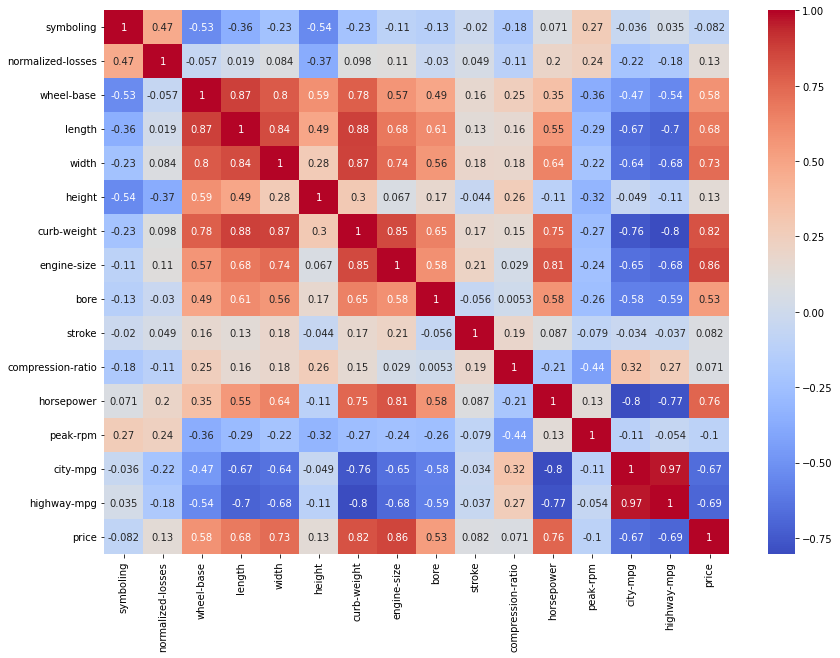

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


## Model 1: No decode label, keep it original 

In [ ]:
X_data1 = df[['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','highway-mpg','city-mpg']]
Y_data1 = df['price']
X_data1

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,highway-mpg,city-mpg
0,88.6,168.8,64.1,2548,130,3.47,111,27,21
1,88.6,168.8,64.1,2548,130,3.47,111,27,21
2,94.5,171.2,65.5,2823,152,2.68,154,26,19
3,99.8,176.6,66.2,2337,109,3.19,102,30,24
4,99.4,176.6,66.4,2824,136,3.19,115,22,18
...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,28,23
201,109.1,188.8,68.8,3049,141,3.78,160,25,19
202,109.1,188.8,68.9,3012,173,3.58,134,23,18
203,109.1,188.8,68.9,3217,145,3.01,106,27,26


In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, Y_data1, test_size=0.6)
y_test1

153     6918
128    37028
194    12940
60      8495
21      5572
       ...  
167     8449
187     9495
22      6377
186     8495
72     35056
Name: price, Length: 123, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
model1=linear_model.LinearRegression()
model1.fit(X_train1,y_train1)
y_pred1=model1.predict(X_test1)

In [ ]:
model1.score(X_test1,y_test1)

0.7847271467235881

## Model 2: Decode label 


In [ ]:
df2 = df[['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','highway-mpg','city-mpg','price']]
df2

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,highway-mpg,city-mpg,price
0,88.6,168.8,64.1,2548,130,3.47,111,27,21,13495
1,88.6,168.8,64.1,2548,130,3.47,111,27,21,16500
2,94.5,171.2,65.5,2823,152,2.68,154,26,19,16500
3,99.8,176.6,66.2,2337,109,3.19,102,30,24,13950
4,99.4,176.6,66.4,2824,136,3.19,115,22,18,17450
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,28,23,16845
201,109.1,188.8,68.8,3049,141,3.78,160,25,19,19045
202,109.1,188.8,68.9,3012,173,3.58,134,23,18,21485
203,109.1,188.8,68.9,3217,145,3.01,106,27,26,22470


In [ ]:
#Bảng dữ liệu dạng chuỗi nên chúng ta cần chuyển sang dạng số để máy tính có thể hiểu và tính toán
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #Thư viện mã hóa các string
df2 = df2.apply(LabelEncoder().fit_transform) #Mã hóa dữ liệu
df2

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,highway-mpg,city-mpg,price
0,2,22,8,92,18,24,31,10,8,118
1,2,22,8,92,18,24,31,10,8,137
2,10,29,16,115,28,1,46,9,6,137
3,30,45,21,66,11,13,27,13,11,123
4,28,45,23,116,22,13,34,5,5,148
...,...,...,...,...,...,...,...,...,...,...
200,46,63,34,125,24,36,33,11,10,143
201,46,63,33,135,24,36,49,8,6,160
202,46,63,34,129,33,27,39,6,5,164
203,46,63,34,151,25,6,29,10,13,166


In [ ]:
X_data2 = df2[['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','highway-mpg','city-mpg']]
Y_data2 = df2['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, Y_data2, test_size=0.6)
X_train2

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,highway-mpg,city-mpg
151,13,8,4,31,6,8,6,20,18
168,24,44,17,90,26,31,35,13,11
179,36,57,28,130,32,15,50,7,6
66,41,40,20,102,21,22,11,21,18
152,13,8,4,26,6,8,6,20,18
...,...,...,...,...,...,...,...,...,...
121,8,19,5,22,4,4,8,20,18
126,3,23,13,107,36,34,57,8,4
176,34,42,24,77,17,16,21,15,14
177,34,42,24,82,17,16,21,15,14


In [ ]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression().fit(X_train2, y_train2)
y_pred2=model2.predict(X_test2)
model2.score(X_test2,y_test2)

0.8161965482093955

## Model 3: After decoding the data, try normalizing it 



In [ ]:
#Bảng dữ liệu dạng chuỗi nên chúng ta cần chuyển sang dạng số để máy tính có thể hiểu và tính toán
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #Thư viện mã hóa các string
df3 = df.apply(LabelEncoder().fit_transform) #Mã hóa dữ liệu
df3

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,5,28,0,1,0,1,0,2,0,2,...,18,5,24,4,13,31,10,8,10,118
1,5,28,0,1,0,1,0,2,0,2,...,18,5,24,4,13,31,10,8,10,137
2,3,28,0,1,0,1,2,2,0,10,...,28,5,1,27,13,46,10,6,9,137
3,4,42,1,1,0,0,3,1,0,30,...,11,5,13,24,22,27,17,11,13,123
4,4,42,1,1,0,0,3,0,0,28,...,22,5,13,24,5,34,17,5,5,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,13,21,1,0,0,3,2,0,46,...,24,5,36,15,20,33,16,10,11,143
201,1,13,21,1,1,0,3,2,0,46,...,24,5,36,15,11,49,15,6,8,160
202,1,13,21,1,0,0,3,2,0,46,...,33,5,27,7,12,39,17,5,6,164
203,1,13,21,0,1,0,3,2,0,46,...,25,3,6,24,31,29,8,13,10,166


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
scaler .fit(df3)
data_minmax= scaler.transform(df3)

In [ ]:
df_minmax = pd.DataFrame(data=data_minmax, columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine_type','number_of_cylinder','engine-size','fuel_sys','bore','stroke','compression-ratio','horsepower','peak-rpm','highway-mpg','city-mpg','price'])
df_minmax

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel_sys,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,1.0,0.56,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.038462,...,0.418605,0.714286,0.631579,0.114286,0.419355,0.525424,0.434783,0.285714,0.344828,0.634409
1,1.0,0.56,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.038462,...,0.418605,0.714286,0.631579,0.114286,0.419355,0.525424,0.434783,0.285714,0.344828,0.736559
2,0.6,0.56,0.000000,1.0,0.0,1.0,0.50,1.0,0.0,0.192308,...,0.651163,0.714286,0.026316,0.771429,0.419355,0.779661,0.434783,0.214286,0.310345,0.736559
3,0.8,0.84,0.047619,1.0,0.0,0.0,0.75,0.5,0.0,0.576923,...,0.255814,0.714286,0.342105,0.685714,0.709677,0.457627,0.739130,0.392857,0.448276,0.661290
4,0.8,0.84,0.047619,1.0,0.0,0.0,0.75,0.0,0.0,0.538462,...,0.511628,0.714286,0.342105,0.685714,0.161290,0.576271,0.739130,0.178571,0.172414,0.795699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.26,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.884615,...,0.558140,0.714286,0.947368,0.428571,0.645161,0.559322,0.695652,0.357143,0.379310,0.768817
201,0.2,0.26,1.000000,1.0,1.0,0.0,0.75,1.0,0.0,0.884615,...,0.558140,0.714286,0.947368,0.428571,0.354839,0.830508,0.652174,0.214286,0.275862,0.860215
202,0.2,0.26,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.884615,...,0.767442,0.714286,0.710526,0.200000,0.387097,0.661017,0.739130,0.178571,0.206897,0.881720
203,0.2,0.26,1.000000,0.0,1.0,0.0,0.75,1.0,0.0,0.884615,...,0.581395,0.428571,0.157895,0.685714,1.000000,0.491525,0.347826,0.464286,0.344828,0.892473


In [ ]:

y = df_minmax["price"].values #lấy y data là cột cuối cùng 
X = df_minmax[['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','highway-mpg','city-mpg']]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression().fit(X_train3, y_train3)
y_pred3=model3.predict(X_test3)
model3.score(X_test3,y_test3)

0.7287917309584631

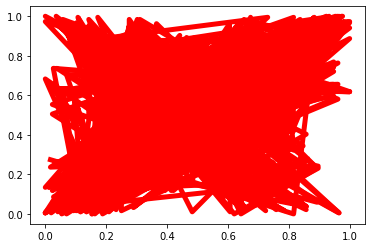

In [ ]:
plt.plot(X_test3, y_test3, linewidth=5, color='red')